In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

In [5]:
data.shape

(1599, 12)

In [6]:
#checking the correlation of variables

In [7]:
corr=data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


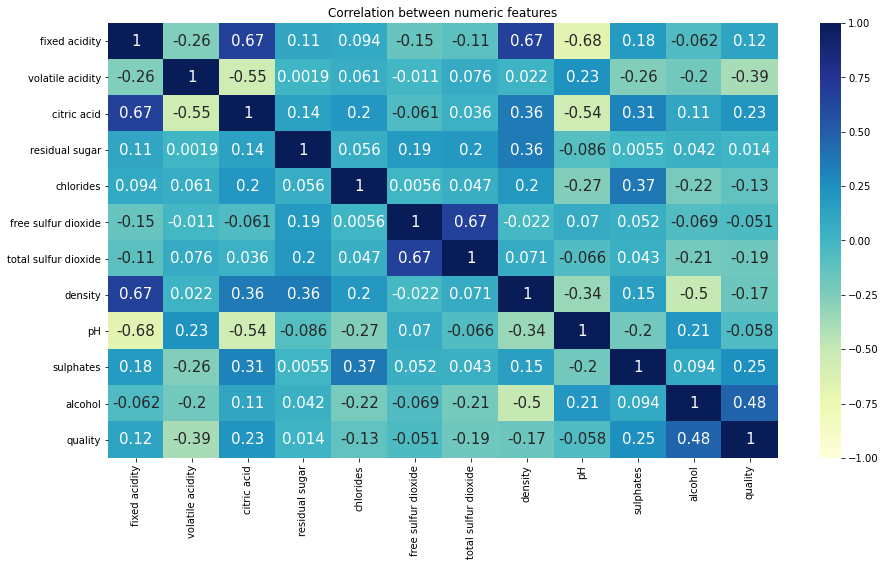

In [8]:
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

In [40]:
data.corr()["quality"].sort_values()

volatile acidity   -0.346962
density            -0.215375
tsd                -0.203374
chlorides          -0.190869
pH                 -0.060288
fd                 -0.003609
residual sugar      0.007934
fixed acidity       0.113422
citric acid         0.212133
sulphates           0.413533
alcohol             0.492551
quality             1.000000
Name: quality, dtype: float64

In [13]:
columns=data.columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

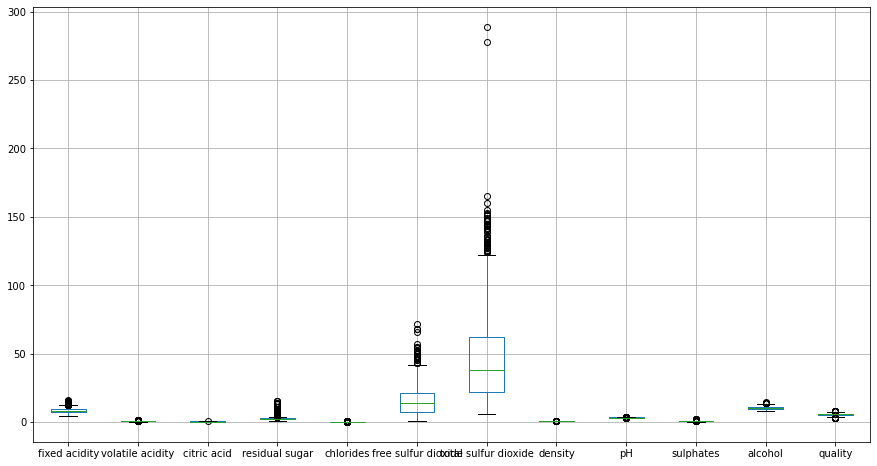

In [14]:
#checking outliers
# set the plot size
plt.rcParams['figure.figsize']=(15,8)

# create a boxplot for all numeric features
# column: selects the specified columns
data.boxplot()

# to display the plot
plt.show()

In [15]:
#There are outliers in 'total sulfur dioxide','free sulfur dioxide','Residual Sugar' majorly.

In [16]:
#Removing outliers by IQR method
Q1 = data.quantile(0.25)


Q3 = data.quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

print(IQR)

fixed acidity           2.100000
volatile acidity        0.250000
citric acid             0.330000
residual sugar          0.700000
chlorides               0.020000
free sulfur dioxide    14.000000
total sulfur dioxide   40.000000
density                 0.002235
pH                      0.190000
sulphates               0.180000
alcohol                 1.600000
quality                 1.000000
dtype: float64


In [27]:
data= data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
data.shape

(1179, 12)

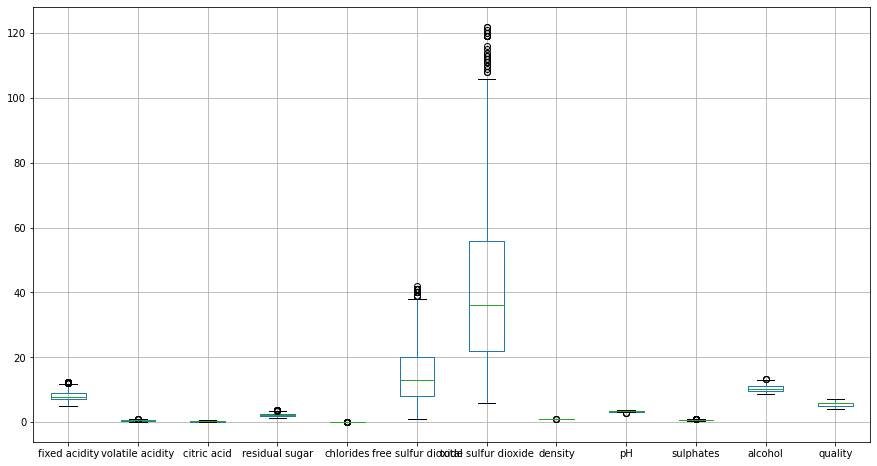

In [19]:
plt.rcParams['figure.figsize']=(15,8)

# create a boxplot for all numeric features
# column: selects the specified columns
data.boxplot()

# to display the plot
plt.show()

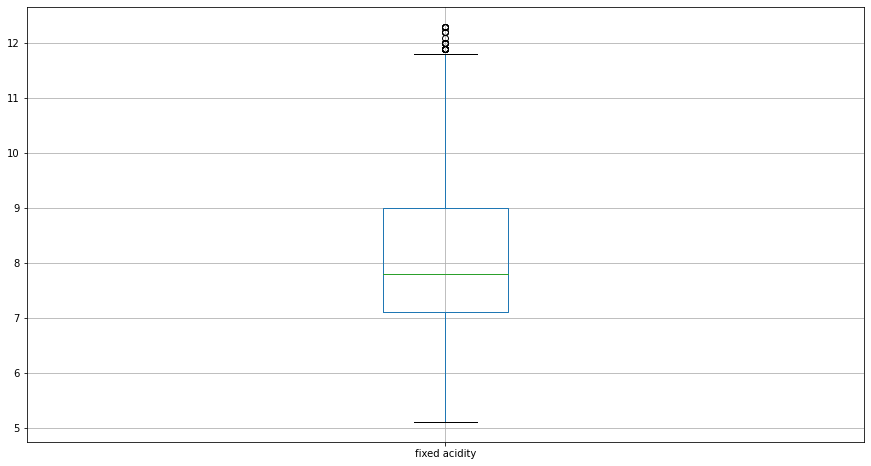

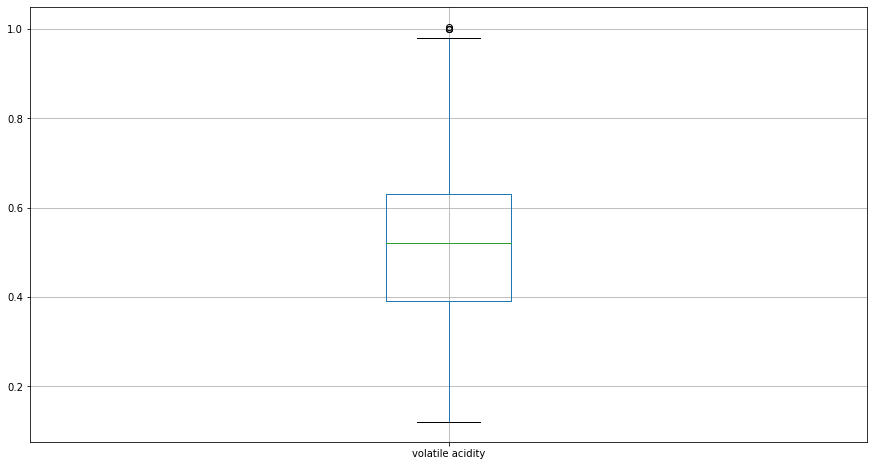

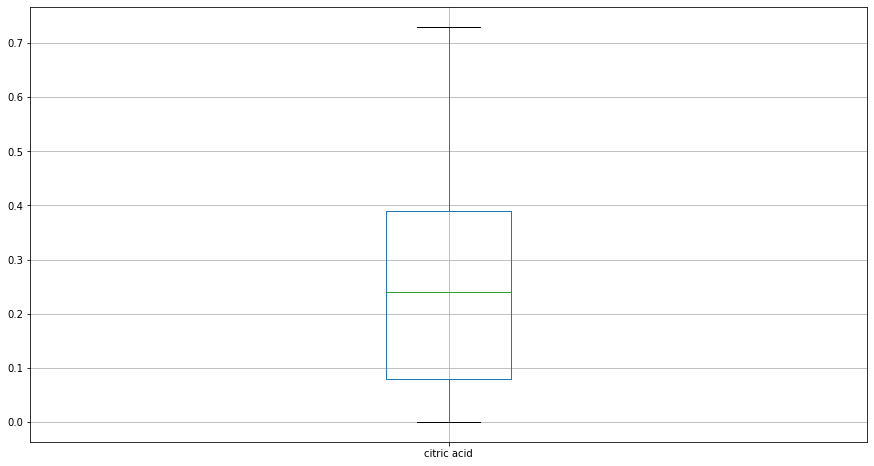

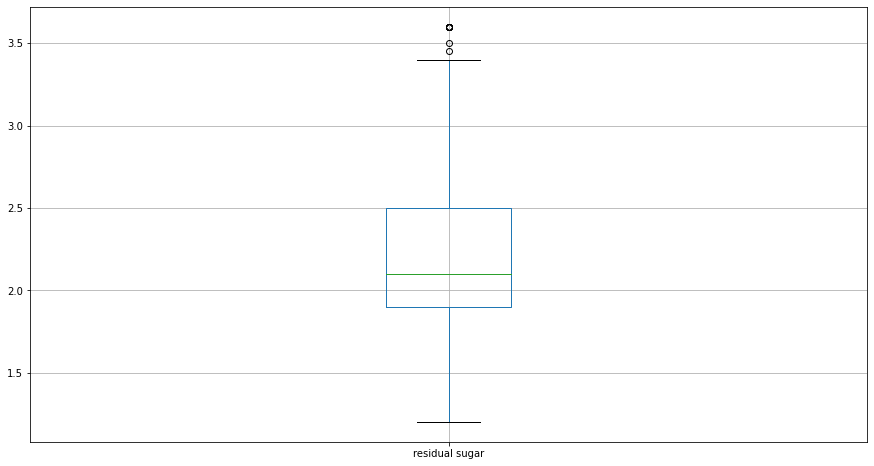

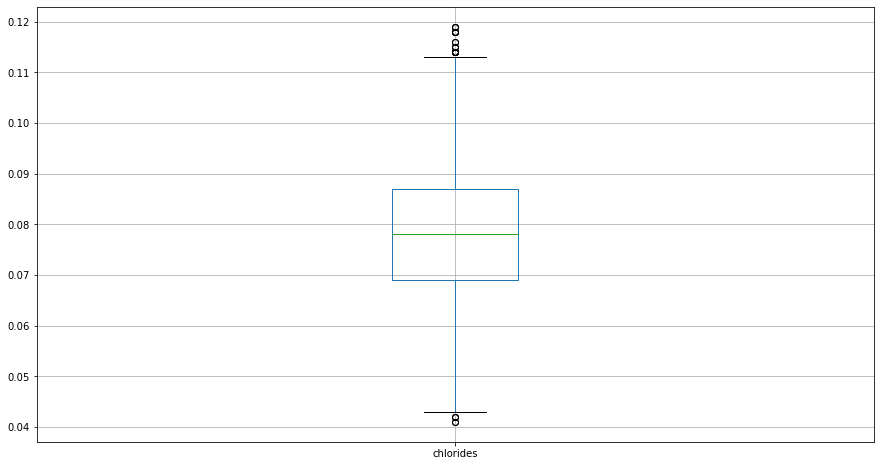

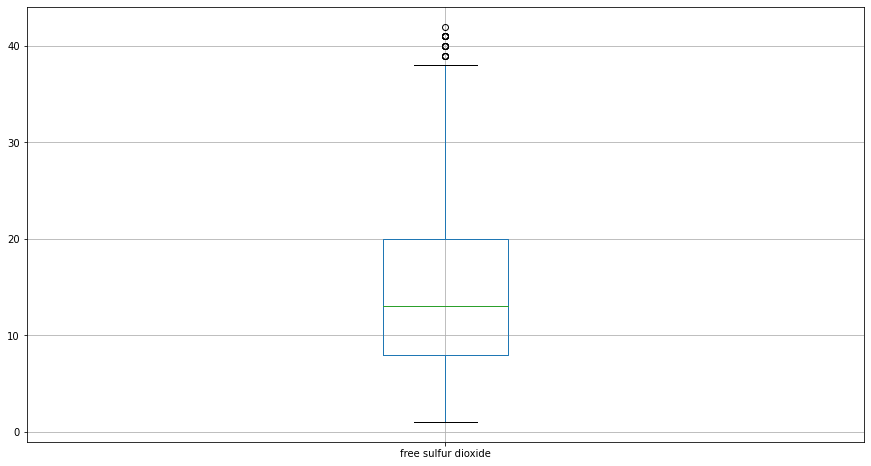

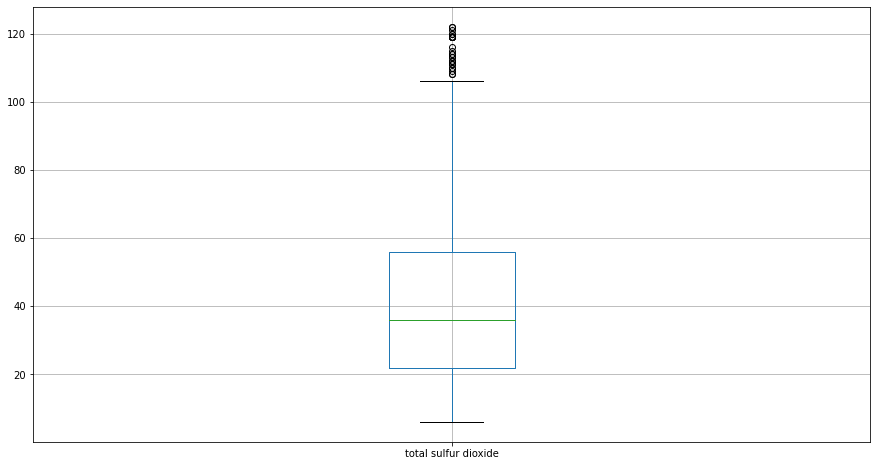

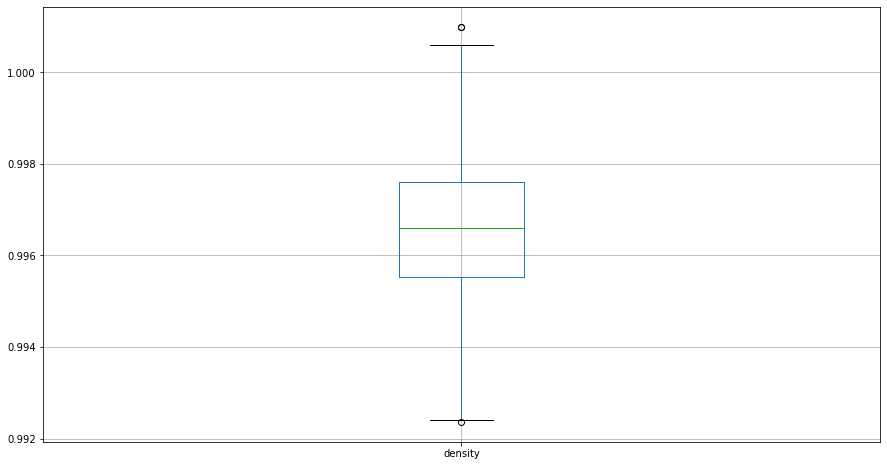

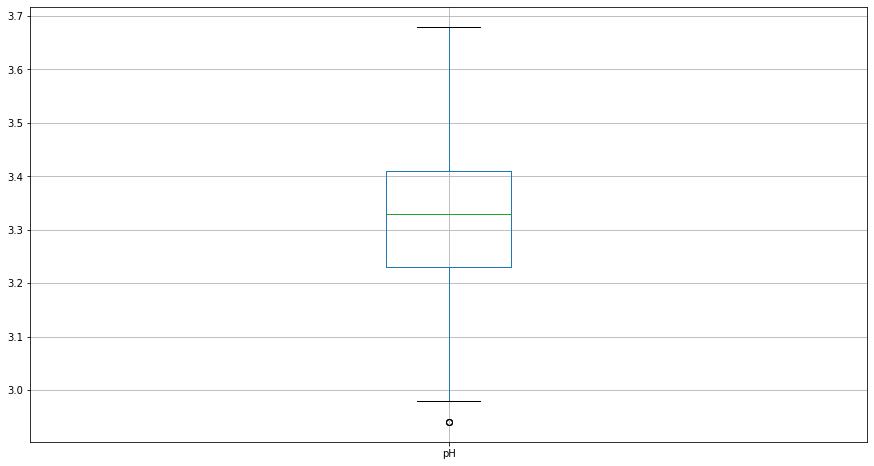

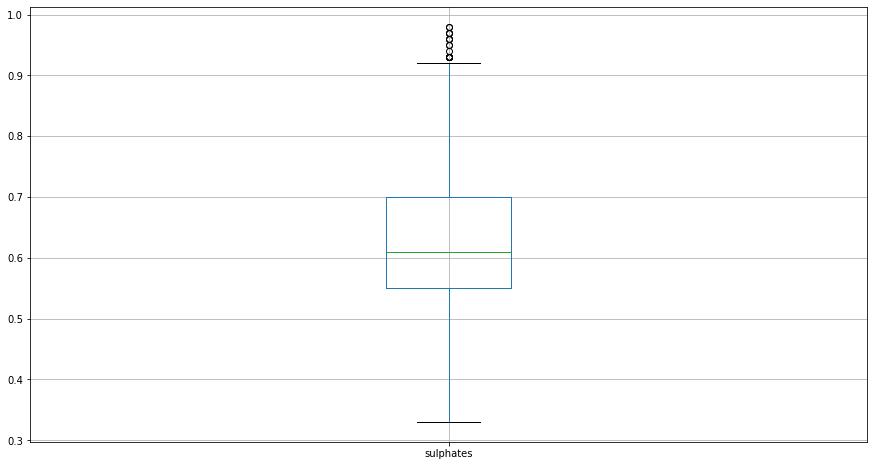

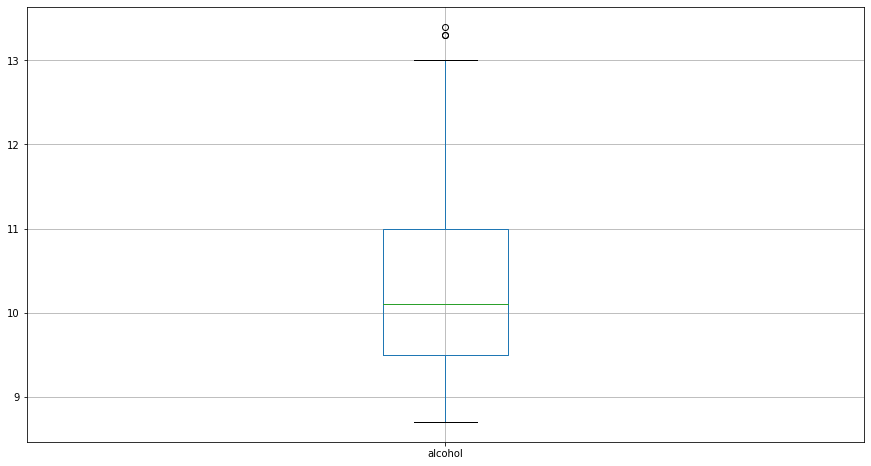

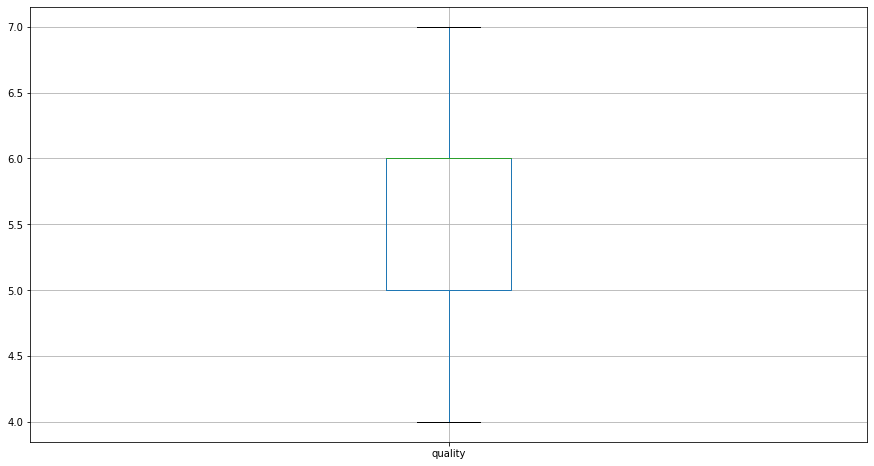

In [20]:
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [36]:
#preprocessing


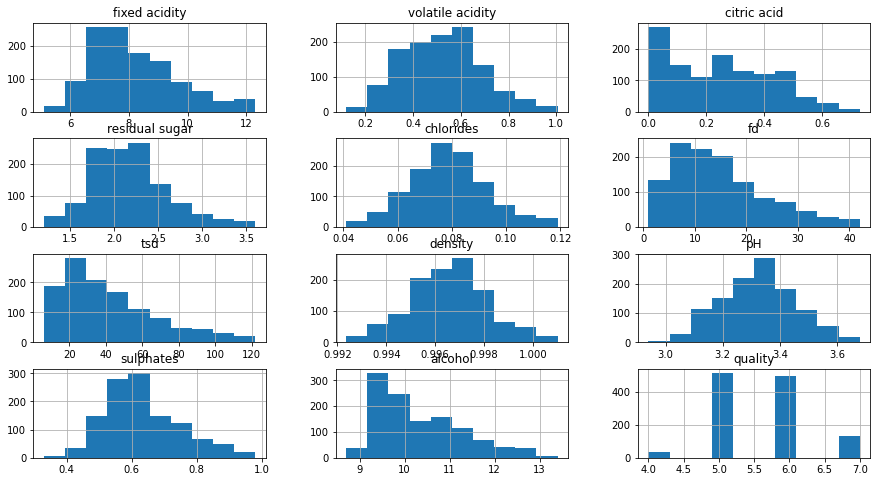

In [46]:
data.hist()
plt.show()

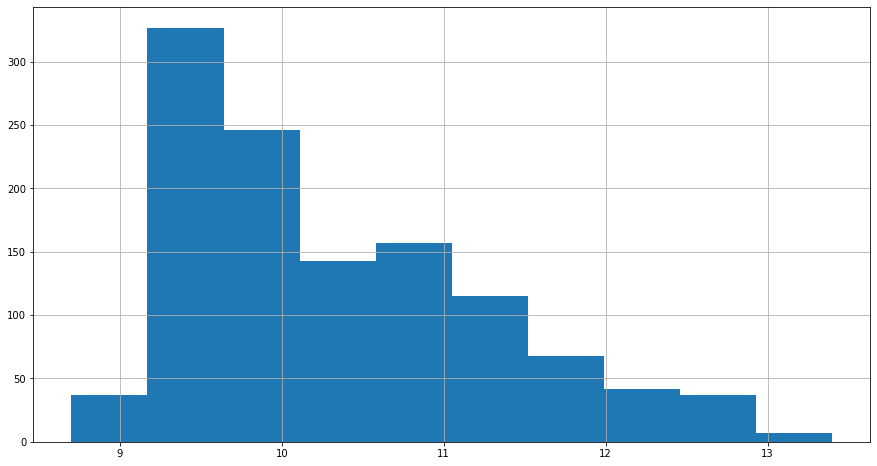

In [47]:
data.alcohol.hist()
plt.show()

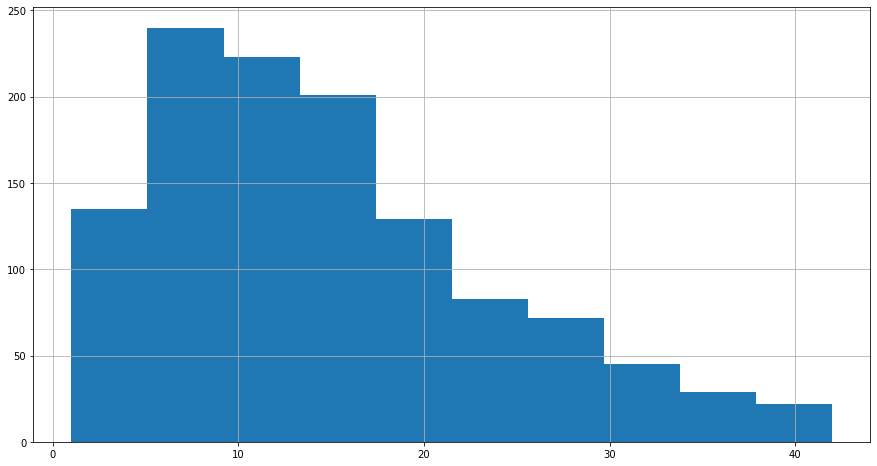

In [50]:
data.fd.hist()
plt.show()

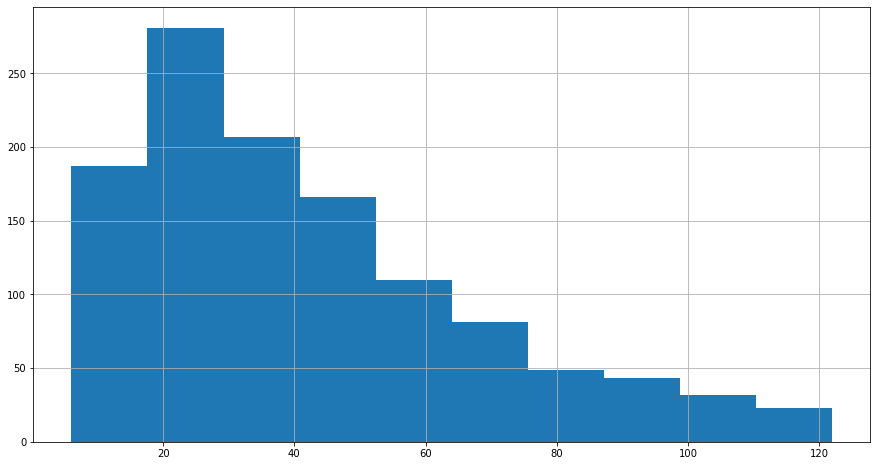

In [52]:
data.tsd.hist()
plt.show()

In [51]:
#from the above visuals we can tell that "alcohol","tsd" and "fd" features are right skewed

In [53]:
data['log_alcohol'] = np.log(data['alcohol'])

# display first 5 rows of the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,fd,tsd,density,pH,sulphates,alcohol,quality,log_alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,2.240710
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,2.282382
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,2.282382
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6,2.282382
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,2.240710


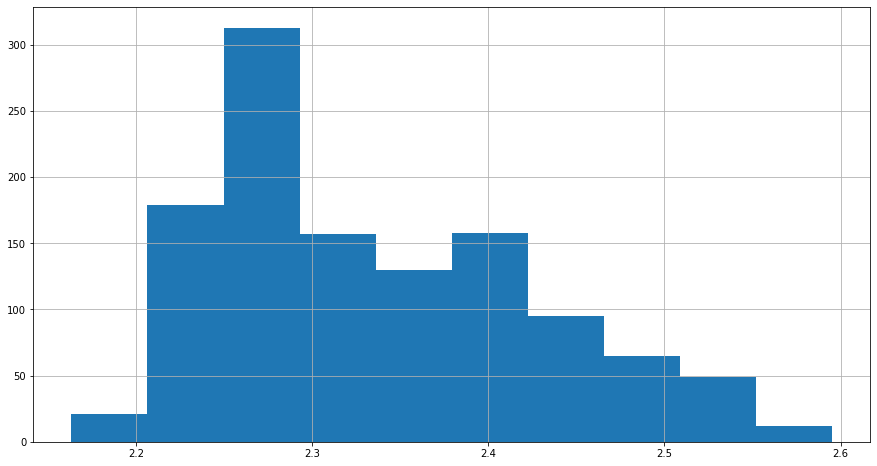

In [54]:
data.log_alcohol.hist()
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
x = data.drop(['quality'],axis=1)
y = data["quality"]
data= sm.add_constant(data)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=50)

In [61]:
print("The shape of X_train is:",X_train.shape)

The shape of X_train is: (825, 12)


In [62]:
print("The shape of X_test is:",X_test.shape)

The shape of X_test is: (354, 12)


In [63]:
print("The shape of y_train is:",y_train.shape)

The shape of y_train is: (825,)


In [64]:
print("The shape of y_test is:",y_test.shape)

The shape of y_test is: (354,)


In [65]:
linreg= sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              6872.
Date:                Sun, 17 Jul 2022   Prob (F-statistic):                        0.00
Time:                        15:50:47   Log-Likelihood:                         -694.40
No. Observations:                 825   AIC:                                      1413.
Df Residuals:                     813   BIC:                                      1469.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [69]:
linreg_pred= linreg.predict(X_test)

In [70]:
linreg_pred

727    5.523121
1492   5.762268
709    5.782902
1580   6.122869
316    5.541442
1369   5.289588
1368   4.892292
1535   5.413214
10     5.120957
1481   5.812963
1355   5.371537
263    5.629872
1351   5.791732
1054   5.082731
1393   5.316578
389    5.836970
818    5.049169
865    5.037819
284    5.669897
1447   5.604055
847    5.395466
739    5.311963
1167   6.768081
1451   6.162300
1067   6.440451
1457   5.052540
143    5.513484
129    5.431243
987    5.236496
321    5.315546
1157   6.465739
114    5.897695
1263   5.041112
48     5.373681
449    5.821265
1229   5.389794
1243   5.176370
1591   5.501822
1344   5.852059
1062   5.994076
1565   6.059911
1125   6.220293
29     5.440465
1595   6.073640
1387   5.332454
1366   5.115374
1249   5.789444
1116   5.759977
12     5.110883
123    5.130932
886    5.480488
708    5.977922
1144   5.711124
1108   5.009648
1247   5.667602
1214   5.697743
1046   5.655624
983    5.876169
912    6.170650
1198   6.316548
580    5.205954
1333   5.052892
1215   6

In [78]:
predicted_quality = (linreg_pred)

actual_quality= y_test

In [79]:
predicted_quality.shape

(354,)

In [80]:
actual_quality.shape

(354,)

In [81]:
linreg_rmse = rmse(actual_quality, predicted_quality)
linreg_rmse

0.5908734672564422

In [82]:
# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg.rsquared_adj 

In [83]:
linreg_full_model_rsquared,linreg_full_model_rsquared_adj

(0.9902378302104364, 0.9900937391434318)